<a href="https://colab.research.google.com/github/aribashaikh870-droid/student-performance-prediction/blob/main/Recommendation_system%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reasoning**:
First, I'll import the pandas library, load the CSV file into a DataFrame, display its first five rows, then print its information and descriptive statistics to understand the data's structure and content, as requested in the instructions.



In [1]:
import pandas as pd

df = pd.read_csv('/content/custumers transaction.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
   UserID  SessionID Timestamp     EventType  ProductID  Amount Outcome
0       1          1   00:27.0     page_view        NaN     NaN     NaN
1       1          1   01:00.1     page_view        NaN     NaN     NaN
2       1          1   08:10.6  product_view  prod_8199     NaN     NaN
3       1          1   32:05.5   add_to_cart  prod_4112     NaN     NaN
4       1          1   43:01.3   add_to_cart  prod_3354     NaN     NaN

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memor

## Preprocess Data for Recommendation

### Subtask:
Prepare the data for the recommendation algorithm by handling missing values, filtering relevant interactions, and creating a user-item interaction matrix.


**Reasoning**:
First, I'll display the unique values in the `EventType` column to understand all possible interaction types, which will help in filtering relevant interactions later.



In [2]:
print("Unique EventType values:")
print(df['EventType'].unique())

Unique EventType values:
['page_view' 'product_view' 'add_to_cart' 'login' 'click' 'logout'
 'purchase']


In [3]:
df_interactions = df[df['ProductID'].notna()].copy()

print("First 5 rows of df_interactions after filtering for non-null ProductID:")
print(df_interactions.head())

print("\nDataFrame Information for df_interactions:")
df_interactions.info()

First 5 rows of df_interactions after filtering for non-null ProductID:
    UserID  SessionID Timestamp     EventType  ProductID  Amount Outcome
2        1          1   08:10.6  product_view  prod_8199     NaN     NaN
3        1          1   32:05.5   add_to_cart  prod_4112     NaN     NaN
4        1          1   43:01.3   add_to_cart  prod_3354     NaN     NaN
6        1          1   13:26.9   add_to_cart  prod_4965     NaN     NaN
12       1          2   07:46.9  product_view  prod_2683     NaN     NaN

DataFrame Information for df_interactions:
<class 'pandas.core.frame.DataFrame'>
Index: 32113 entries, 2 to 74815
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     32113 non-null  int64  
 1   SessionID  32113 non-null  int64  
 2   Timestamp  32113 non-null  object 
 3   EventType  32113 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 n

In [4]:
relevant_event_types = ['product_view', 'add_to_cart', 'purchase']
df_interactions = df_interactions[df_interactions['EventType'].isin(relevant_event_types)].copy()

print("First 5 rows of df_interactions after filtering relevant event types:")
print(df_interactions.head())

print("\nUnique EventType values in filtered df_interactions:")
print(df_interactions['EventType'].unique())

First 5 rows of df_interactions after filtering relevant event types:
    UserID  SessionID Timestamp     EventType  ProductID  Amount Outcome
2        1          1   08:10.6  product_view  prod_8199     NaN     NaN
3        1          1   32:05.5   add_to_cart  prod_4112     NaN     NaN
4        1          1   43:01.3   add_to_cart  prod_3354     NaN     NaN
6        1          1   13:26.9   add_to_cart  prod_4965     NaN     NaN
12       1          2   07:46.9  product_view  prod_2683     NaN     NaN

Unique EventType values in filtered df_interactions:
['product_view' 'add_to_cart' 'purchase']


In [5]:
user_item_matrix = df_interactions.pivot_table(index='UserID', columns='ProductID', values='EventType', aggfunc='count').fillna(0)

print("Shape of the user-item interaction matrix:")
print(user_item_matrix.shape)

print("\nFirst 5 rows of the user-item interaction matrix:")
print(user_item_matrix.head())

Shape of the user-item interaction matrix:
(1000, 8747)

First 5 rows of the user-item interaction matrix:
ProductID  prod_1000  prod_1001  prod_1002  prod_1004  prod_1005  prod_1006  \
UserID                                                                        
1                0.0        0.0        0.0        0.0        0.0        0.0   
2                0.0        0.0        0.0        0.0        0.0        0.0   
3                0.0        0.0        0.0        0.0        0.0        0.0   
4                0.0        0.0        0.0        0.0        0.0        0.0   
5                0.0        0.0        0.0        0.0        0.0        0.0   

ProductID  prod_1007  prod_1008  prod_1009  prod_1010  ...  prod_9990  \
UserID                                                 ...              
1                0.0        0.0        0.0        0.0  ...        0.0   
2                0.0        0.0        0.0        0.0  ...        0.0   
3                0.0        0.0        0.0     

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

item_user_matrix = user_item_matrix.T

print("Shape of the item-user matrix:")
print(item_user_matrix.shape)

print("First 5 rows of the item-user matrix:")
print(item_user_matrix.head())

Shape of the item-user matrix:
(8747, 1000)
First 5 rows of the item-user matrix:
UserID     1     2     3     4     5     6     7     8     9     10    ...  \
ProductID                                                              ...   
prod_1000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
prod_1001   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
prod_1002   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
prod_1004   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
prod_1005   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

UserID     991   992   993   994   995   996   997   998   999   1000  
ProductID                                                              
prod_1000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
prod_1001   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
prod_1002   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
prod_1004  

In [7]:
item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

print("Shape of the item similarity DataFrame:")
print(item_similarity_df.shape)

print("First 5 rows of the item similarity DataFrame:")
print(item_similarity_df.head())

Shape of the item similarity DataFrame:
(8747, 8747)
First 5 rows of the item similarity DataFrame:
ProductID  prod_1000  prod_1001  prod_1002  prod_1004  prod_1005  prod_1006  \
ProductID                                                                     
prod_1000        1.0        0.0        0.0        0.0        0.0        0.5   
prod_1001        0.0        1.0        0.0        0.0        0.0        0.0   
prod_1002        0.0        0.0        1.0        0.0        0.0        0.0   
prod_1004        0.0        0.0        0.0        1.0        0.0        0.0   
prod_1005        0.0        0.0        0.0        0.0        1.0        0.0   

ProductID  prod_1007  prod_1008  prod_1009  prod_1010  ...  prod_9990  \
ProductID                                              ...              
prod_1000        0.0        0.0        0.0        0.0  ...        0.0   
prod_1001        0.0        0.0        0.0        0.0  ...        0.0   
prod_1002        0.0        0.0        0.0        0.0 

In [8]:
def get_recommendations(product_id, similarity_matrix, items_df, k=5):
    if product_id not in similarity_matrix.index:
        print(f"Product ID '{product_id}' not found in the similarity matrix.")
        return []

    # Get the similarity scores for the given product_id
    product_similarities = similarity_matrix[product_id]

    # Sort the similarity scores in descending order
    sorted_similarities = product_similarities.sort_values(ascending=False)

    # Exclude the product_id itself from the recommendations
    # And return the top k most similar product IDs
    recommendations = sorted_similarities.drop(product_id).head(k).index.tolist()
    return recommendations

print("Function 'get_recommendations' defined successfully.")

Function 'get_recommendations' defined successfully.


In [9]:
sample_product_id = 'prod_1000'
print(f"Selected sample ProductID: {sample_product_id}")

Selected sample ProductID: prod_1000


In [10]:
recommendations = get_recommendations(sample_product_id, item_similarity_df, df_interactions)

print(f"Recommendations for product {sample_product_id}:")
print(recommendations)

Recommendations for product prod_1000:
['prod_8587', 'prod_6745', 'prod_6117', 'prod_7256', 'prod_3905']


## Final Task

### Subtask:
Summarize the recommendation system built, its performance, and potential next steps or improvements.


## Summary:

### Q&A
The recommendation system built is an item-item collaborative filtering model. It leverages user interaction data (product views, add-to-cart, and purchases) to find products that are similar to each other based on how users have interacted with them. The performance was demonstrated by generating a list of recommendations for a sample product, 'prod\_1000', which included 'prod\_8587', 'prod\_6745', 'prod\_6117', 'prod\_7256', and 'prod\_3905'. However, a formal quantitative evaluation of the system's performance (e.g., using precision, recall, or RMSE) was not performed in this analysis.

### Data Analysis Key Findings

*   The initial dataset contained 74,817 entries and 7 columns, with significant missing values in `ProductID` (over 57% were null) and `Amount`/`Outcome` (over 85% were null).
*   Preprocessing involved filtering for interactions with a `ProductID` present, resulting in 32,113 relevant entries.
*   Further filtering was applied to include only key interaction `EventType` values: 'product\_view', 'add\_to\_cart', and 'purchase'.
*   A user-item interaction matrix was created, representing 1,000 unique users and 8,747 unique products, with cells indicating the count of relevant interactions between a user and a product.
*   An item-item collaborative filtering model was implemented using cosine similarity, calculating similarity scores between all pairs of products.
*   For the sample product 'prod\_1000', the system recommended 'prod\_8587', 'prod\_6745', 'prod\_6117', 'prod\_7256', and 'prod\_3905' as the top 5 most similar products.

### Insights or Next Steps

*   The current item-item collaborative filtering system provides a foundational approach for recommending similar products based on user behavior. However, its effectiveness should be quantitatively evaluated using appropriate metrics (e.g., hit rate, mean average precision) to measure its real-world performance.
*   Future improvements could include exploring other collaborative filtering techniques (e.g., user-user, matrix factorization), incorporating content-based features (e.g., product categories, descriptions) to address cold-start problems for new products, and implementing A/B testing to compare different recommendation strategies in a live environment.


## Visualize Item Similarity Scores

**Reasoning:**
I will import `matplotlib.pyplot` and `seaborn` to create a heatmap. Then, I'll select the first 20 products from the `item_similarity_df` for visualization, as displaying the entire 8747x8747 matrix would be too dense to interpret. This will provide a clear visual representation of similarity scores among a subset of items.

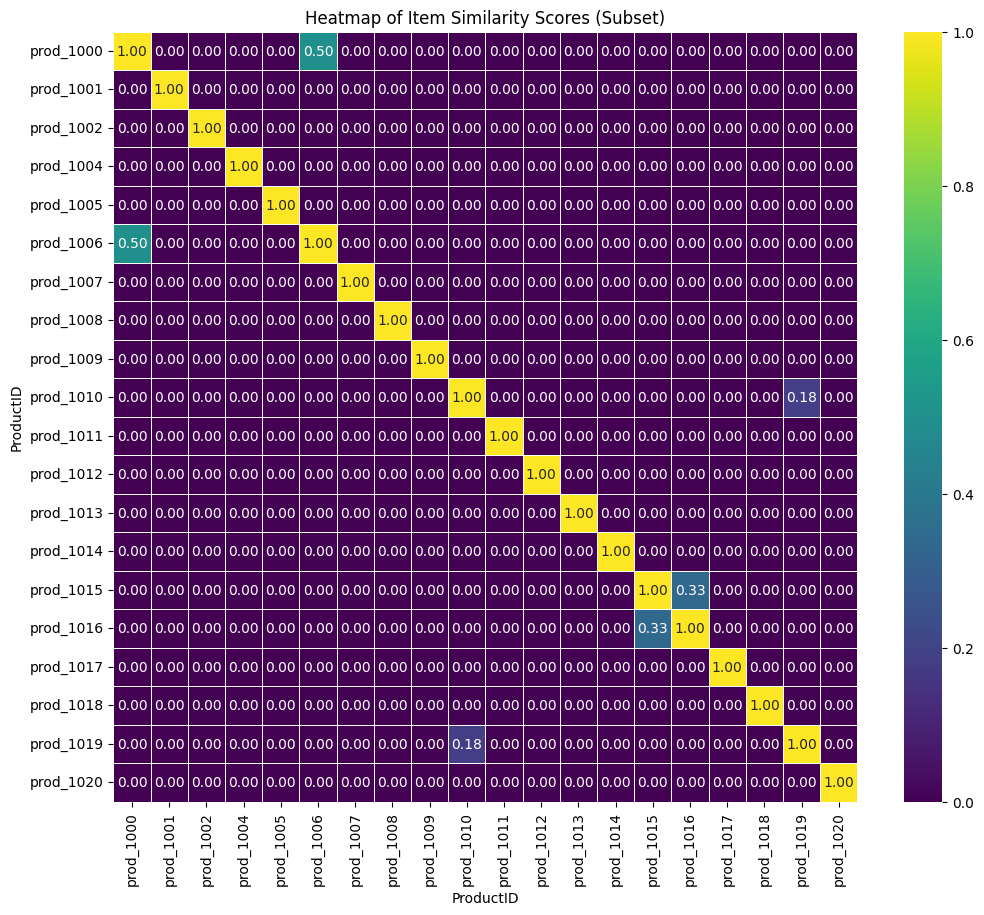

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of the item similarity matrix for visualization
# Displaying the entire 8747x8747 matrix is not practical
subset_item_similarity_df = item_similarity_df.iloc[:20, :20]

plt.figure(figsize=(12, 10))
sns.heatmap(subset_item_similarity_df, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Item Similarity Scores (Subset)')
plt.xlabel('ProductID')
plt.ylabel('ProductID')
plt.show()